# k-d tree

## Setup

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import sys

sns.set()
sys.path.append('../trees/scripts/')

from k_d_tree import KDTree

In [2]:
data_path = os.path.join('../data/')
n_hospitals = 10
n_patients = 7
np.random.seed(42)

## Data

In [3]:
hospitals = []
for i in range(n_hospitals):
    patients = []
    for j in range(n_patients):
        weight = np.random.randint(40, 131)
        age = np.random.randint(15, 91)
        saturation = np.random.randint(80, 101)
        patients.append({
            'peso': weight,
            'idade': age,
            'saturação': saturation
        })
    x, y = np.random.rand(2, )
    hospitals.append({
        'localização': [round(x, 2), round(y, 2)],
        'pacientes': patients
    })
    
data = {'hospitais': hospitals}
data

{'hospitais': [{'localização': [0.62, 0.61],
   'pacientes': [{'peso': 91, 'idade': 29, 'saturação': 90},
    {'peso': 111, 'idade': 75, 'saturação': 100},
    {'peso': 122, 'idade': 89, 'saturação': 90},
    {'peso': 127, 'idade': 38, 'saturação': 82},
    {'peso': 61, 'idade': 67, 'saturação': 81},
    {'peso': 127, 'idade': 44, 'saturação': 85},
    {'peso': 41, 'idade': 78, 'saturação': 100}]},
  {'localização': [0.81, 0.3],
   'pacientes': [{'peso': 128, 'idade': 63, 'saturação': 89},
    {'peso': 99, 'idade': 29, 'saturação': 94},
    {'peso': 101, 'idade': 65, 'saturação': 91},
    {'peso': 94, 'idade': 78, 'saturação': 82},
    {'peso': 90, 'idade': 21, 'saturação': 100},
    {'peso': 112, 'idade': 53, 'saturação': 97},
    {'peso': 43, 'idade': 74, 'saturação': 93}]},
  {'localização': [0.4, 0.93],
   'pacientes': [{'peso': 92, 'idade': 16, 'saturação': 99},
    {'peso': 99, 'idade': 85, 'saturação': 91},
    {'peso': 47, 'idade': 61, 'saturação': 82},
    {'peso': 117, 'idade

In [4]:
with open(os.path.join(data_path, 'hospitals.json'), 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

## Case study

### Search for nearest hospital

In [5]:
supervisor = [0.5, 0.5]

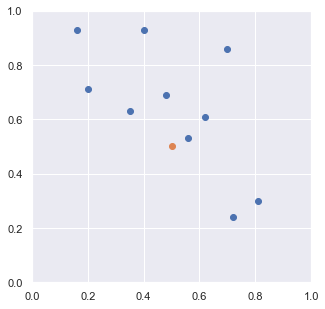

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
points = np.array([hospital['localização'] for hospital in data['hospitais']])
ax.scatter(points[:, 0], points[:, 1])
ax.scatter(*supervisor)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [7]:
hospitals_tree = KDTree(2)
for hospital in data['hospitais']:
    hospitals_tree.add(hospital['localização'], metadata=hospital)

In [8]:
hospitals_tree.knn(supervisor, 1)

[{'node': [0.56, 0.53],
  'metadata': {'localização': [0.56, 0.53],
   'pacientes': [{'peso': 98, 'idade': 50, 'saturação': 98},
    {'peso': 129, 'idade': 81, 'saturação': 98},
    {'peso': 59, 'idade': 85, 'saturação': 99},
    {'peso': 72, 'idade': 54, 'saturação': 86},
    {'peso': 121, 'idade': 15, 'saturação': 90},
    {'peso': 96, 'idade': 64, 'saturação': 89},
    {'peso': 46, 'idade': 30, 'saturação': 95}]}}]

In [9]:
nearest_hospital = hospitals_tree.knn(supervisor, 1)[0]['metadata']
nearest_hospital

{'localização': [0.56, 0.53],
 'pacientes': [{'peso': 98, 'idade': 50, 'saturação': 98},
  {'peso': 129, 'idade': 81, 'saturação': 98},
  {'peso': 59, 'idade': 85, 'saturação': 99},
  {'peso': 72, 'idade': 54, 'saturação': 86},
  {'peso': 121, 'idade': 15, 'saturação': 90},
  {'peso': 96, 'idade': 64, 'saturação': 89},
  {'peso': 46, 'idade': 30, 'saturação': 95}]}

### Search for "nearest" patients

In [10]:
def normalize(weight, age, saturation):
    return (weight-40)/90, (age-15)/75, (saturation-80)/20

In [11]:
x = 3
chosen_patient = [46, 30, 96]

n_patients = x

In [12]:
patients_tree = KDTree(3)
for patient in nearest_hospital['pacientes']:
    patients_tree.add(
        list(normalize(patient['peso'], patient['idade'], patient['saturação'])),
        metadata=patient
    )

In [13]:
patients_tree.knn(list(normalize(*chosen_patient)), x)

[{'node': [0.06666666666666667, 0.2, 0.75],
  'metadata': {'peso': 46, 'idade': 30, 'saturação': 95}},
 {'node': [0.6444444444444445, 0.4666666666666667, 0.9],
  'metadata': {'peso': 98, 'idade': 50, 'saturação': 98}},
 {'node': [0.35555555555555557, 0.52, 0.3],
  'metadata': {'peso': 72, 'idade': 54, 'saturação': 86}}]